In [1]:
from y0.algorithm.ioscm_id import (
    _simplify_strongly_connected_components,
    get_apt_order,
    get_consolidated_district,
    get_graph_consolidated_districts,
    get_vertex_consolidated_district,
    is_apt_order,
    scc_to_bidirected,
)
from y0.dsl import R, W, X, Y, Z
from y0.graph import NxMixedGraph

# From [correa20a]_, Figure 2c.
simple_cyclic_graph_1 = NxMixedGraph.from_edges(
    directed=[
        (R, X),
        (X, W),
        (W, Z),
        (Z, X),
        (W, Y),
    ],
)

simple_cyclic_graph_2 = NxMixedGraph.from_edges(
    directed=[
        (X, W),
        (W, Z),
        (Z, X),
        (W, Y),
    ],
    undirected=[
        (R, X),
    ],
)

/Users/zuck016/Projects/CausalInference/y0-causal-inference/y0/src/y0/algorithm/ioscm_id.py:292: SyntaxWarning: invalid escape sequence '\l'
  """Validate inputs for is_apt_order function.
/Users/zuck016/Projects/CausalInference/y0-causal-inference/y0/src/y0/algorithm/ioscm_id.py:336: SyntaxWarning: invalid escape sequence '\i'
  """ This function checks property 2: Nodes in the same SCC must appear consecutively.
/Users/zuck016/Projects/CausalInference/y0-causal-inference/y0/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


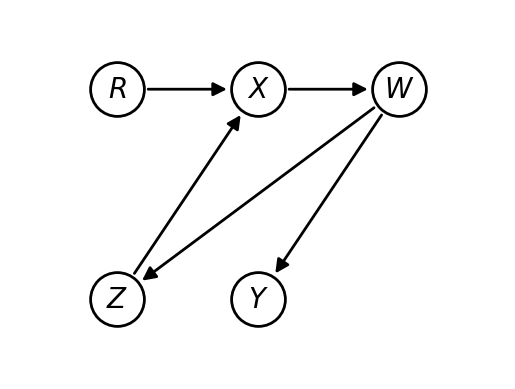

In [3]:
simple_cyclic_graph_1.draw()

# Definition 9.2 [forre et al 2020]

See Definition 9.2 of [forré20a]_.

Let $G$ be a directed mixed graph (DMG) with set of nodes $V$. An assembling pseudo-topological order (apt-order) of $G$ is a total order $\lt$ on $V$ with the following two properties:
1. For every $v, w \in V$ we have:

$$w \in \text{Anc}^{G}(v) \backslash \text{Sc}^{G}(v) \Longrightarrow w \lt v$$

2. For every $v_1, v_2, w \in V$ we have:

$$v_2 \in \text{Sc}^{G}(v_1) \land(v_1 \le w \le v_2) \Longrightarrow w \in \text{Sc}^{G}(v_1)$$
